# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings  # Suppressing warnings
warnings.filterwarnings('ignore')


In [3]:
# Import the libraries you will be using for analysis
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2


In [5]:
# Importing Basic Libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import pyarrow.parquet as pq  # Parquet file handling
import seaborn as sns  # Data visualization
import matplotlib as map  # Plotting utilities
import matplotlib.pyplot as plt  # Plotting library
import datetime as dt  # Date and time operations

In [7]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

df = pd.read_parquet(r'C:\Users\asman\PycharmProjects\iitb\NYtaxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [11]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample instead 0.05 considered 0.007 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain  <font color = red>instead 5%</font>  <font color = green>considered 0.7%</font>  values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\asman\PycharmProjects\iitb\NYtaxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        df1 = pd.read_parquet(file_path)
        df1['Date'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.date
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for day in df1['Date'].unique():
            day_val = df1[df1['Date'] == day]
            day_val['Hour'] = pd.to_datetime(day_val['tpep_pickup_datetime']).dt.hour
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_val = day_val[day_val['Hour'] == hour]
                # Sample 5% of the hourly data randomly
                sample = hour_val.sample(frac = 0.007, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
        
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [15]:
df.shape

(265487, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [17]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet(r'C:\Users\asman\PycharmProjects\iitb\NYtaxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [19]:
# Load the new data file
df = pd.read_parquet(r'C:\Users\asman\PycharmProjects\iitb\NYtaxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023.parquet')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265487 entries, 428 to 2700137
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  float6

In [23]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Date', 'Hour',
       'Airport_fee'],
      dtype='object')

In [25]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
428               256             2  ...      0.5        0.00           0.0   
1113              237             1  ...      0.5        2.58           0.0   
819               141             2  ...      0.5        0.00           0.0   
3192              142             2  ...      0.5        0.00           0.0   
2995263           107             0  ...      0.5        5.93           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
428                        1.0         41.15                   0.0   
1113                       1.0         15.48                   2.5   
819                        1.0         16.40                   2.5   
3192                       1.0         11.50                   2.5   
2995263                    1.0         35.57                   NaN   

         airport_fee        Date  Hour Airport_fee  
428             1.25  2023-01-01     0         NaN  
1113            0.00  2023-01-01     0         NaN  
819             0.00  2023-01-01     0         NaN  
3192            0.00  2023-01-01     0         NaN  
2995263          NaN  2023-01-01     0         NaN  

[5 rows x 22 columns]

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [27]:
# Fix the index and drop any columns that are not needed
# Go through the problem statement and determine which columns are unseful here and drop it a later stage
df.drop(columns=['VendorID','store_and_fwd_flag'],inplace= True)
# Convert the column from float to integer
df['RatecodeID'] = df['RatecodeID'].astype(int)
#'mta_tax', 'improvement_surcharge' not dropping for now

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [29]:
# Combine the two airport fee columns
df["Airport_fee"] = df[["airport_fee", "Airport_fee"]].max(axis=1)


In [31]:
df.drop('airport_fee',axis=1,inplace=True)

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [33]:
# check where values of fare amount are negative
df[df['fare_amount']<0]


Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Date, Hour, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [77]:
# Analyse RatecodeID for the negative fare amounts
#There are no negative fare amounts.Hence, we cannot analyse with RatecodeID further


In [37]:
# Find which columns have negative values
numerical_columns = ["passenger_count","trip_distance","PULocationID","DOLocationID",
                     "fare_amount","extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge",
                     "total_amount","congestion_surcharge","Airport_fee"]
numerical_negative_columns = []

for col in numerical_columns:
    if (df[col].values <0).any() :
        numerical_negative_columns.append(col)

numerical_negative_columns


['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [39]:
# fix these negative values
for col in numerical_negative_columns:
    df[col] = df[col].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [41]:
# Find the proportion of missing values in each column
(df.isnull().sum()*100)/len(df)
# Missing Values Column --> passenger_count, RatecodeID, congestion_surcharge and Airport_fee(~3%)

tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.32634
trip_distance            0.00000
RatecodeID               3.32634
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.32634
Date                     0.00000
Hour                     0.00000
Airport_fee              3.32634
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [65]:
# Display the rows with null values
df[df.isna().any(axis=1)]
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(),inplace= True)

Did you find zeroes in passenger_count? Handle these.

In [67]:
df['passenger_count'].value_counts()
#I have not found any zeroes in passenger_count

passenger_count
1.0    202229
2.0     38669
3.0      9640
4.0      5340
0.0      4070
5.0      3300
6.0      2234
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [49]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0],inplace= True)

In [71]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     251084
2.0      10081
99.0      1530
5.0       1428
3.0        845
4.0        519
Name: count, dtype: int64

In [73]:
#RatecodeID description does not has 99 but when we perform value_counts 99 is showing.
df['RatecodeID'] = df['RatecodeID'].apply(lambda x: df['RatecodeID'].mode()[0] if x == 99 else x)

In [75]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    252614
2.0     10081
5.0      1428
3.0       845
4.0       519
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [79]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(),inplace= True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [83]:
# Handle any remaining missing values
handle_missing_numericalvalues = [
    #"passenger_count", #handled above
                     "trip_distance","PULocationID","DOLocationID",
                     "fare_amount","extra","mta_tax","tip_amount",
                     "tolls_amount","improvement_surcharge","total_amount",
    #"congestion_surcharge", #handled above
                    "Airport_fee"]

for col in handle_missing_numericalvalues:
    df[col].fillna(df[col].median(),inplace= True)

In [85]:
(df.isnull().sum()*100)/len(df)

tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Date                     0.0
Hour                     0.0
Airport_fee              0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

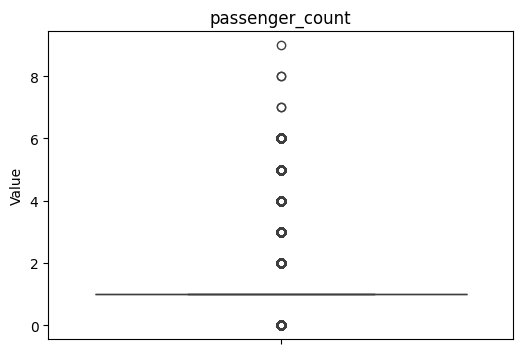

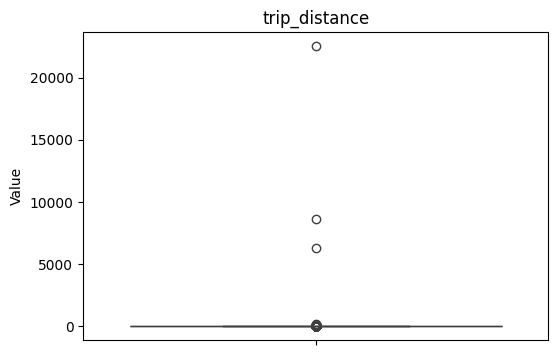

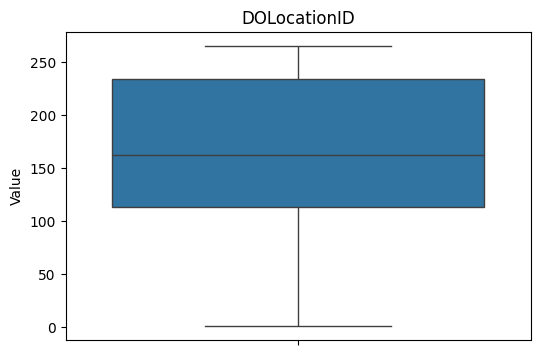

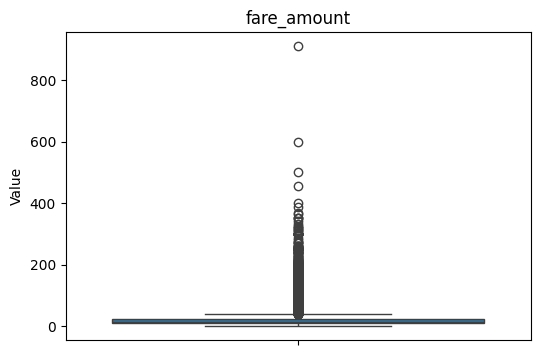

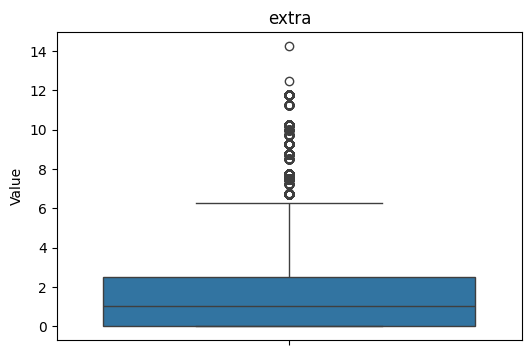

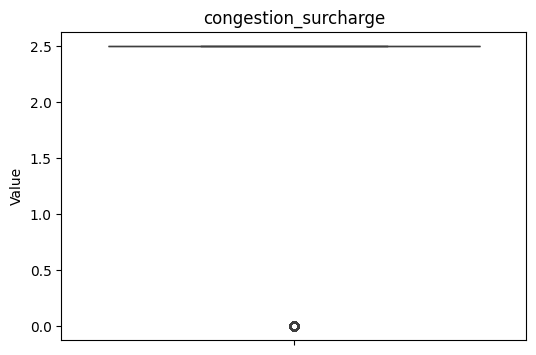

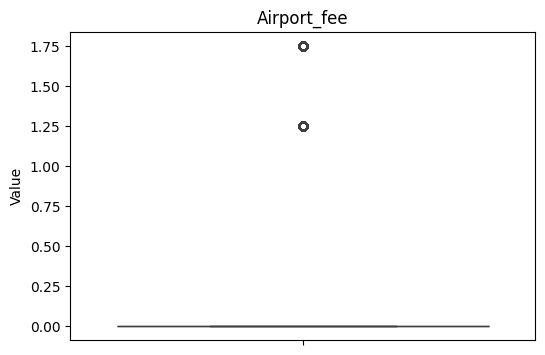

In [89]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
#numerical_columns = ['passenger_count','trip_distance','fare_amount','extra','tip_amount','tolls_amount','congestion_surcharge'] -- To be removed
# Plot box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col].dropna())
    plt.title(col)
    plt.ylabel('Value')
    plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [91]:
df.shape

(265487, 19)

In [93]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
df.drop(df[(df["fare_amount"]==0) & (df["trip_distance"]==0) &(df["PULocationID"]==df["DOLocationID"])].index, inplace=True)
df.drop(df[(df["payment_type"]==0)].index, inplace=True)

In [95]:
#Count of records before outlier
df.shape

(256351, 19)

In [97]:
# Continue with outlier handling
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numerical_columns:
    df = remove_outliers_iqr(df, column)

In [99]:
df.shape

(153223, 19)

In [101]:
# Do any columns need standardising?
# NO

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [103]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Date',
 'Hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Numerical
* `DOLocationID`: Numerical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical

The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [106]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df.tpep_pickup_datetime.dt.hour
df['weekday_num'] = df.tpep_pickup_datetime.dt.weekday
df['month'] = df.tpep_pickup_datetime.dt.month

In [108]:
def clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)


    # width of each bin on the plot
    width = (2*np.pi) / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # set the lable go clockwise and start from the top
    ax.set_theta_zero_location("N")
    # clockwise
    ax.set_theta_direction(-1)

    # set the label
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)

In [110]:
plt.figure(figsize = (15,15))
ax = plt.subplot(2,2,1, polar=True)
    # make the histogram that bined on 24 hour
radii = np.array(df['pickup_hour'].value_counts(sort = False).tolist(), dtype="int64")
# radii = np.array(df['pickup_hour'].value_counts().tolist(), dtype="int64")
title = "Trips per Hour"
clock(ax, radii, title, "#dc143c")

In [112]:
sns.distplot(df.weekday_num, bins=20, color="g")
plt.ylabel('Trip Counts',fontsize = 15)
plt.xlabel('WeekDay',fontsize = 15)
plt.title('Trips per WeekDay',fontsize = 20)
plt.show()

In [120]:
sns.distplot(df.month, bins=30, color="g")
plt.ylabel('Trip Counts',fontsize = 15)
plt.xlabel('Months',fontsize = 15)
plt.title('Trips per Month',fontsize = 20)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [122]:
# Analyse the above parametersIn
numerical_financial_columns = ["fare_amount","tip_amount","total_amount","trip_distance"]
numerical_financial_zero_or_negative_columns = []

for col in numerical_financial_columns:
    if (df[col].values <=0).any() :
        numerical_financial_zero_or_negative_columns.append(col)

numerical_financial_zero_or_negative_columns

['fare_amount', 'tip_amount', 'trip_distance']

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [124]:
# Create a df with non zero entries for the selected parameters.
# No its not suitable to drop cases where distance = 0 as the distance travelled might be less within the same zone but it has generated the revenue
df1=df[(df["fare_amount"]>0) | (df["tip_amount"]>0)]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [128]:
df1.shape

(153211, 22)

In [137]:
# Group data by month and analyse monthly revenue
df1.groupby('month')['total_amount'].plot(kind='kde', legend=True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [139]:
# Calculate proportion of each quarter
df1.groupby(df1['tpep_pickup_datetime'].dt.to_period('Q'))['total_amount'].sum()


tpep_pickup_datetime
2023Q1    772928.81
2023Q2    817709.74
2023Q3    674594.44
2023Q4    825445.93
Freq: Q-DEC, Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

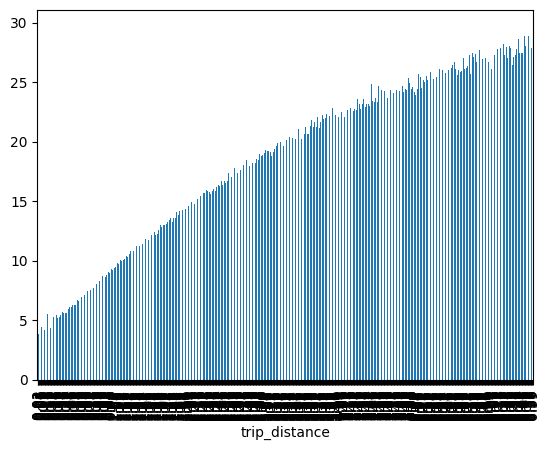

In [141]:
# Show how trip fare is affected by distance
df2=df1[(df1["trip_distance"]>0)]
df2.groupby('trip_distance').fare_amount.mean().plot(kind = 'bar')
plt.show()


In [143]:
#correlation value for trip_distance and fare_amount
df2['trip_distance'].corr(df2['fare_amount'])

0.8695405846478957

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [333]:
# Show relationship between fare and trip duration
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds().astype(int)

In [343]:
df2 = df2[df2['trip_duration']>0]

In [345]:
df2.groupby('trip_duration').fare_amount.mean().plot(kind = 'bar')
plt.show()

In [347]:
#correlation value for trip_duration and fare_amount
df2['trip_duration'].corr(df2['fare_amount'])

0.17860423270217393

In [155]:
# Show relationship between fare and number of passengers
df2.groupby('passenger_count').fare_amount.mean().plot(kind = 'bar')
plt.show()


In [163]:
#correlation value for passenger_count and fare_amount
df2['passenger_count'].corr(df2['fare_amount'])

nan

In [159]:
# Show relationship between tip and trip distance
df2.groupby('trip_distance').tip_amount.mean().plot(kind = 'bar')
plt.show()

In [161]:
#correlation value for trip_distance and tip_amount
df2['trip_distance'].corr(df2['tip_amount'])

0.35478053580390184

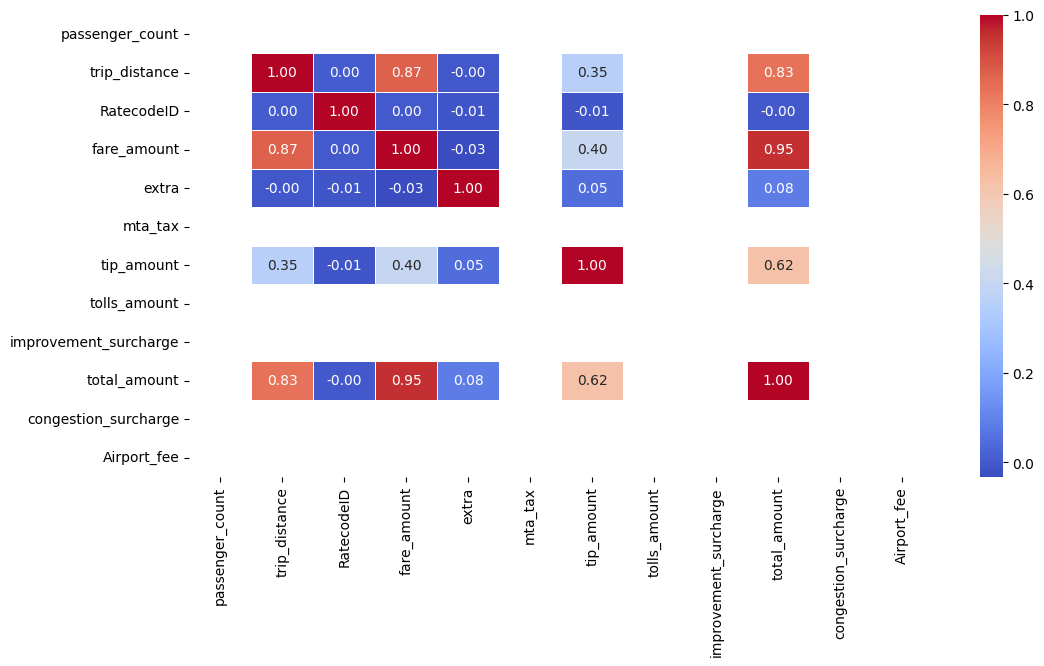

In [179]:
num_cols = df2.select_dtypes('float','int')
plt.figure(figsize=(12,6))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [181]:
# Analyse the distribution of different payment types (payment_type).
df2.groupby('payment_type').sum(numeric_only=True).plot(kind='pie',y='trip_distance')


<Axes: ylabel='trip_distance'>

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [190]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 1.0 MB/s eta 0:00:15
   - -------------------------------------- 0.8/16.2 MB 1.1 MB/s eta 0:00:15
   -- ------------------------------------- 1.0/16.2 MB 1.1 MB/s eta 0:00:15
   --- ------------------------------------ 1.3/16.2 MB 1.1 MB/s eta 0:00:14
   --- ------------------------------------ 1.6/16.2 MB 1.1 MB/s eta 0:00:14
   ---- ----------------------------------- 1.8/16.2 MB 1.1 MB/s eta 0:00:14
   ---- ----------------------------------- 1.8/16.2 MB 1.1 MB/s eta 0:00:14
   ----- ---------------------------------- 2.1/16.2 MB 1.1 MB/s eta 0:00:13
   ----- ---------------------------------- 2.4/16.2 MB 1.1 MB/s eta 0:00:13
   ------ --------------------------------- 2.6/16.2 MB 1.1 MB/s eta 0:00:13
   ------- ---------

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [191]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\asman\PycharmProjects\iitb\NYtaxi\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

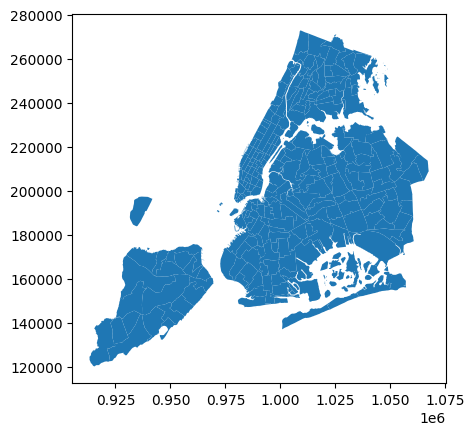

In [194]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [198]:
# Merge zones and trip records using locationID and PULocationID
df2.merge(zones, left_on='PULocationID', right_on='LocationID')


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
1       2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
2       2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
3       2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
4       2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   
...                     ...                   ...              ...   
151383  2023-09-30 23:17:53   2023-09-30 23:32:07              1.0   
151384  2023-09-30 23:09:40   2023-09-30 23:34:26              1.0   
151385  2023-09-30 23:09:50   2023-09-30 23:25:31              1.0   
151386  2023-09-30 23:02:41   2023-09-30 23:19:28              1.0   
151387  2023-09-30 23:04:38   2023-09-30 23:15:39              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                0.54         1.0           143           142             2   
1                3.16         1.0            79           256             1   
2                0.78         1.0           237           229             2   
3                2.78         1.0            79           186             1   
4                2.43         1.0           144           186             1   
...               ...         ...           ...           ...           ...   
151383           3.56         1.0           246           151             1   
151384           3.72         1.0           161            41             1   
151385           3.05         1.0           255           148             1   
151386           3.40         1.0           107           141             1   
151387           1.20         1.0           137           170             1   

        fare_amount  extra  ...  weekday_num  month   trip_duration  OBJECTID  \
0               6.5    1.0  ...            6      1 0 days 00:05:00       143   
1              19.1    1.0  ...            6      1 0 days 00:15:00        79   
2               7.2    1.0  ...            6      1 0 days 00:05:00       237   
3              19.8    1.0  ...            6      1 0 days 00:20:00        79   
4              18.4    1.0  ...            6      1 0 days 00:18:00       144   
...             ...    ...  ...          ...    ...             ...       ...   
151383         18.4    1.0  ...            5      9 0 days 00:14:00       246   
151384         24.7    1.0  ...            5      9 0 days 00:24:00       161   
151385         18.4    1.0  ...            5      9 0 days 00:15:00       255   
151386         19.1    3.5  ...            5      9 0 days 00:16:00       107   
151387         10.0    3.5  ...            5      9 0 days 00:11:00       137   

        Shape_Leng  Shape_Area                       zone  LocationID  \
0         0.054180    0.000151        Lincoln Square West         143   
1         0.042625    0.000108               East Village          79   
2         0.042213    0.000096      Upper East Side South         237   
3         0.042625    0.000108               East Village          79   
4         0.027620    0.000047        Little Italy/NoLiTa         144   
...            ...         ...                        ...         ...   
151383    0.069467    0.000281  West Chelsea/Hudson Yards         246   
151384    0.035804    0.000072             Midtown Center         161   
151385    0.062384    0.000172  Williamsburg (North Side)         255   
151386    0.038041    0.000075                   Gramercy         107   
151387    0.046108    0.000116                   Kips Bay         137   

          borough                                           geometry  
0       Manhattan  POLYGON ((989338.1 223572.253, 989368.225 2235...  
1       Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...  
2       Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...  
3       Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...  
4       Manh

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [207]:
# Group data by location and calculate the number of trips
trip_counts_per_location = df2.groupby(['PULocationID']).size()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [215]:
# Merge trip counts back to the zones GeoDataFrame

#zones.merge(trip_counts_per_location, left_on='LocationID', right_on='PULocationID')
zones['tripCounts'] = pd.Series(trip_counts_per_location)


In [217]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   tripCounts  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4       161.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [219]:
# Define figure and axis


# Plot the map and display it
zones.plot(column="tripCounts", cmap="viridis", legend=True, figsize=(10, 8))

plt.title("Trip Count by Zone")

plt.show()



In [221]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values('tripCounts')


OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
132       133    0.065135    0.000157                 Kensington         133   
129       130    0.142028    0.000468                    Jamaica         130   
195       196    0.083242    0.000197                  Rego Park         196   
257       258    0.089013    0.000366                  Woodhaven         258   
167       168    0.114517    0.000547     Mott Haven/Port Morris         168   
..        ...         ...         ...                        ...         ...   
252       253    0.036051    0.000078              Willets Point         253   
253       254    0.085886    0.000360   Williamsbridge/Olinville         254   
254       255    0.062384    0.000172  Williamsburg (North Side)         255   
258       259    0.126750    0.000395         Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                   Woodside         260   

      borough                                           geometry  tripCounts  
132  Brooklyn  POLYGON ((990302.048 175188.312, 990417.95 174...         1.0  
129    Queens  POLYGON ((1048117.059 198683.432, 1047994.802 ...         1.0  
195    Queens  POLYGON ((1023709.727 204759.778, 1023685.76 2...         1.0  
257    Queens  POLYGON ((1027223.758 190451.926, 1027233.961 ...         1.0  
167     Bronx  MULTIPOLYGON (((1005062.701 236452.633, 100528...         1.0  
..        ...                                                ...         ...  
252    Queens  POLYGON ((1028825.348 218121.42, 1029152.461 2...         NaN  
253     Bronx  POLYGON ((1025214.477 259577.301, 1025348.099 ...         NaN  
254  Brooklyn  POLYGON ((994849.011 203499.267, 994911.093 20...         NaN  
258     Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...         NaN  
259    Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...         NaN  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [262]:
df2.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3192  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2504  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
3427  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
2080  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
3444  2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3192           0.54         1.0           143           142             2   
2504           3.16         1.0            79           256             1   
3427           0.78         1.0           237           229             2   
2080           2.78         1.0            79           186             1   
3444           2.43         1.0           144           186             1   

      fare_amount  extra  ...  improvement_surcharge  total_amount  \
3192          6.5    1.0  ...                    1.0         11.50   
2504         19.1    1.0  ...                    1.0         30.12   
3427          7.2    1.0  ...                    1.0         12.20   
2080         19.8    1.0  ...                    1.0         29.76   
3444         18.4    1.0  ...                    1.0         28.08   

      congestion_surcharge        Date  Hour  Airport_fee pickup_hour  \
3192                   2.5  2023-01-01     0          0.0           0   
2504                   2.5  2023-01-01     0          0.0           0   
3427                   2.5  2023-01-01     0          0.0           0   
2080                   2.5  2023-01-01     0          0.0           0   
3444                   2.5  2023-01-01     0          0.0           0   

      weekday_num  month   trip_duration  
3192            6      1 0 days 00:05:00  
2504            6      1 0 days 00:15:00  
3427            6      1 0 days 00:05:00  
2080            6      1 0 days 00:20:00  
3444            6      1 0 days 00:18:00  

[5 rows x 23 columns]

In [353]:
# # # Find routes which have the slowest speeds at different times of the day
df2['average_speed'] = df2['trip_duration']/df2['trip_distance']
df2.sort_values(by='average_speed').head(1)
 

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1279529  2023-04-13 16:41:05   2023-04-13 16:41:06              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1279529            3.5         1.0           231           231             2   

         fare_amount  extra  ...  total_amount  congestion_surcharge  \
1279529          3.0    5.0  ...           9.5                   2.5   

               Date  Hour  Airport_fee  pickup_hour weekday_num  month  \
1279529  2023-04-13    16          0.0           16           3      4   

         trip_duration  average_speed  
1279529              1       0.285714  

[1 rows x 24 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [247]:
# Visualise the number of trips per hour and find the busiest hour

df2.groupby("Hour").size().sort_values(ascending=False).head(1)

Hour
18    11134
dtype: int64

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [365]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
df2.groupby("Hour").size().sort_values(ascending=False).head(5).sum()



49517

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Axes: xlabel='day_type'>

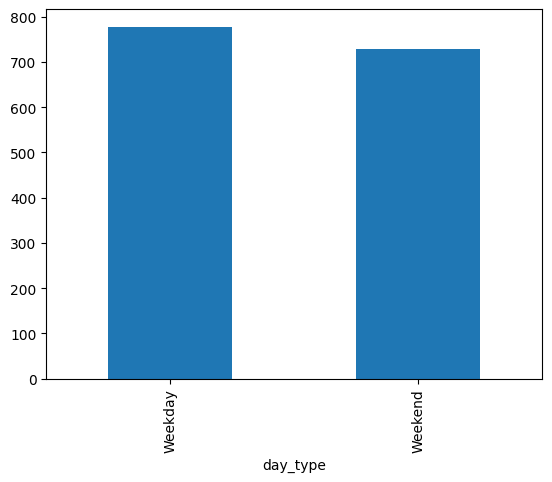

In [376]:
# Compare traffic trends for the week days and weekends
df2["day_type"] = df2["weekday_num"].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
df2.groupby('day_type').trip_duration.mean().plot(kind = 'bar')

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [388]:
# Find top 10 pickup and dropoff zones
df2.groupby("pickup_hour")['PULocationID'].size().sort_values(ascending=False).head(10)

pickup_hour
18    11134
17    10336
19     9740
15     9168
16     9139
14     9069
13     8659
20     8592
12     8578
21     8277
Name: PULocationID, dtype: int64

In [394]:
df2['dropoff_hour'] = df2.tpep_dropoff_datetime.dt.hour
df2.groupby("dropoff_hour")['DOLocationID'].size().sort_values(ascending=False).head(10)

dropoff_hour
18    11229
19    10274
17    10012
15     9197
16     9171
14     8871
20     8645
13     8630
12     8598
21     8313
Name: DOLocationID, dtype: int64

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [396]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
df2.groupby("PULocationID")['DOLocationID'].size().sort_values(ascending=False).head(10)


PULocationID
237    8943
161    8111
236    7734
162    6575
186    5922
142    5748
170    5288
239    5008
230    5003
163    4941
Name: DOLocationID, dtype: int64

In [398]:
df2.groupby("PULocationID")['DOLocationID'].size().sort_values(ascending=True).head(10)

PULocationID
257    1
132    1
129    1
168    1
173    1
80     1
195    1
34     1
167    1
260    2
Name: DOLocationID, dtype: int64

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [437]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df3=df2[df2['dropoff_hour'].isin([23,0,1,2,3,4,5])]
df3.groupby("dropoff_timeperiod")['DOLocationID'].size().sort_values(ascending=False).head(10)

dropoff_hour
23    5875
0     4287
1     2964
2     1991
3     1300
4      792
5      577
Name: DOLocationID, dtype: int64

In [442]:
df4=df2[df2['pickup_hour'].isin([23,0,1,2,3,4,5])]
df4.groupby("pickup_hour")['PULocationID'].size().sort_values(ascending=False).head(10)

pickup_hour
23    5517
0     4007
1     2737
2     1852
3     1211
4      700
5      650
Name: PULocationID, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

<Axes: ylabel='total_amount'>

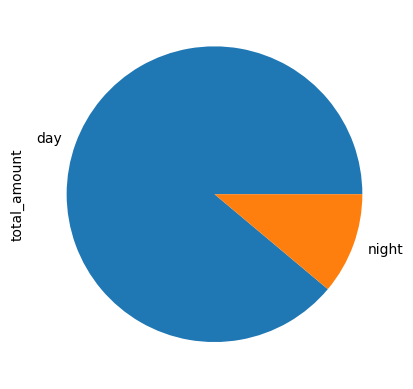

In [450]:
# Filter for night hours (11 PM to 5 AM)
df2["timeperiod"] = df2["pickup_hour"].apply(lambda x: 'night' if (x >= 23 or x <= 5) else 'day')
df2.groupby('timeperiod')['total_amount'].sum(numeric_only=True).plot(kind='pie')

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

<Axes: xlabel='passenger_count'>

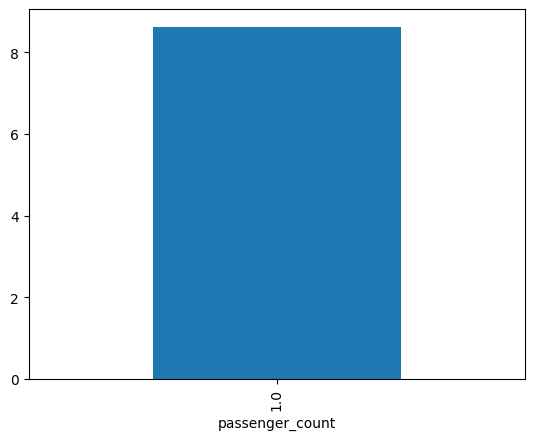

In [461]:
# Analyse the fare per mile per passenger for different passenger counts
df2['fare_mile_passenger'] = df2['fare_amount']/(df2['trip_distance']*df2['passenger_count'])
df2.groupby('passenger_count')['fare_mile_passenger'].mean().plot(kind='bar')


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<Axes: ylabel='fare_mile_passenger'>

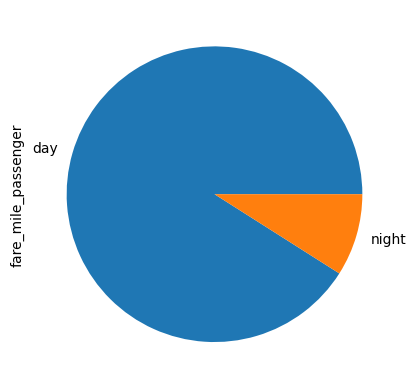

In [464]:
# Compare the average fare per mile for different days and for different times of the day
df2.groupby('timeperiod')['fare_mile_passenger'].sum(numeric_only=True).plot(kind='pie')


<Axes: ylabel='fare_mile_passenger'>

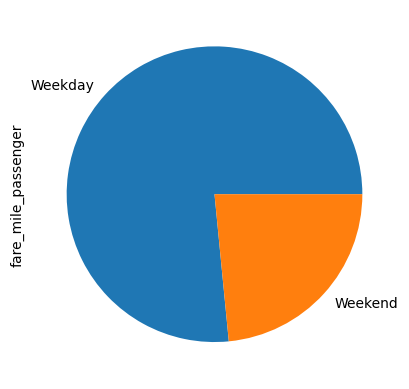

In [466]:
df2.groupby('day_type')['fare_mile_passenger'].sum(numeric_only=True).plot(kind='pie')

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

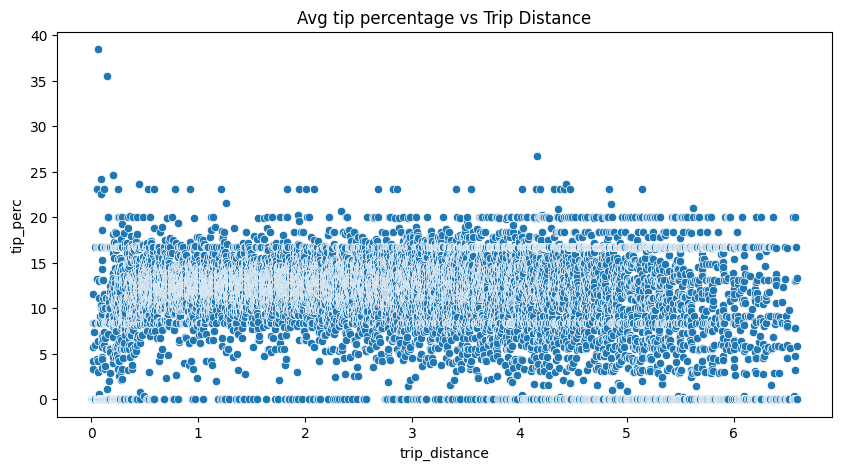

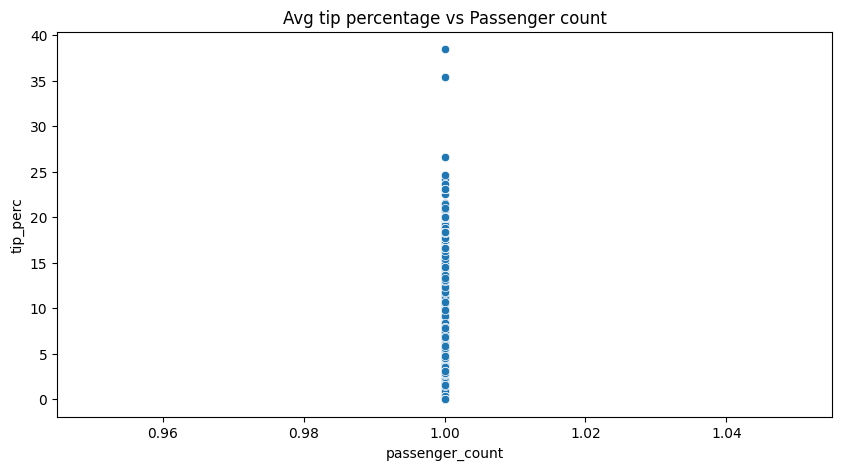

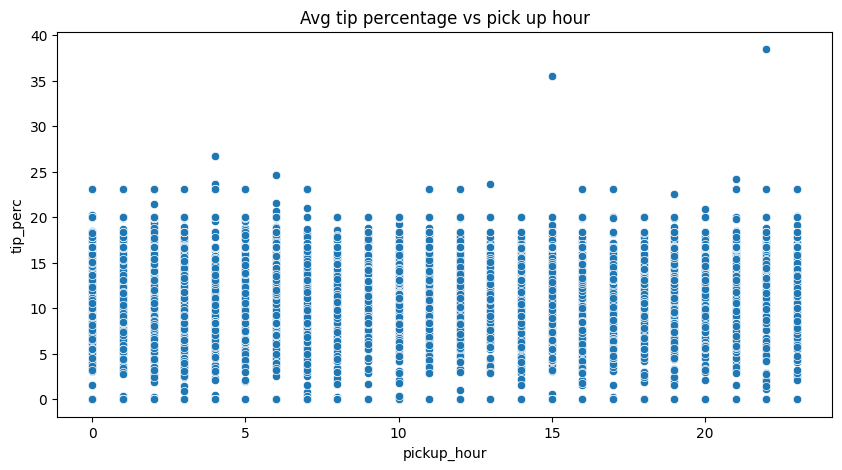

In [478]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df2['tip_perc']=(df2['tip_amount']/df2['total_amount'])*100
grouped_data = df2.groupby(['trip_distance','passenger_count','pickup_hour'])
average_tip_perc = grouped_data['tip_perc'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.scatterplot(x='trip_distance',y='tip_perc',data=average_tip_perc)
plt.title('Avg tip percentage vs Trip Distance')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='passenger_count',y='tip_perc',data=average_tip_perc)
plt.title('Avg tip percentage vs Passenger count')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='pickup_hour',y='tip_perc',data=average_tip_perc)
plt.title('Avg tip percentage vs pick up hour')
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

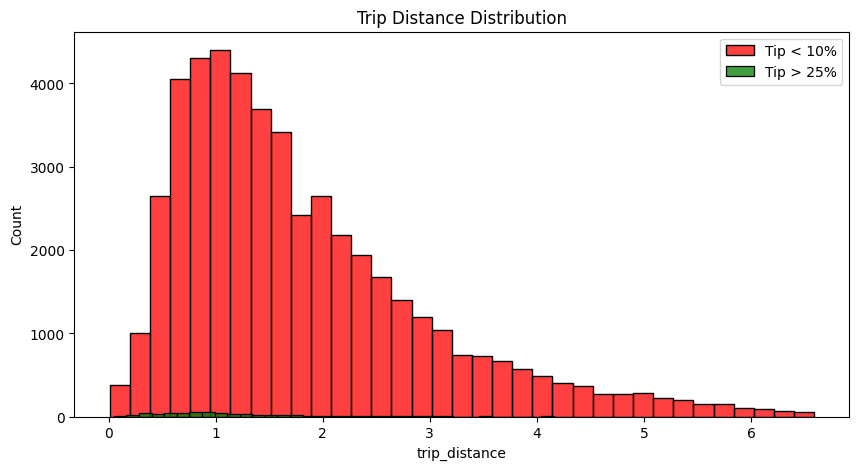

In [482]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

lt_1operc_tips = df2[df2['tip_perc']<10]
gt_25perc_tips = df2[df2['tip_perc']>25]

plt.figure(figsize=(10,5))
sns.histplot(lt_1operc_tips['trip_distance'],color='red',label='Tip < 10%',bins=35)
sns.histplot(gt_25perc_tips['trip_distance'],color='green',label='Tip > 25%',bins=35)
plt.title('Trip Distance Distribution')
plt.legend()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

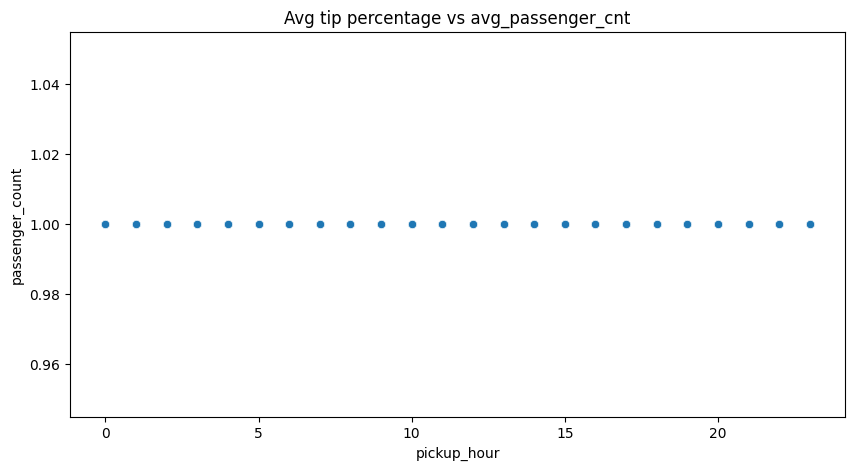

In [484]:
# See how passenger count varies across hours and days

grouped_data_pickuphour_weekday = df2.groupby(['pickup_hour','weekday_num'])
avg_passenger_cnt = grouped_data_pickuphour_weekday['passenger_count'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.scatterplot(x='pickup_hour',y='passenger_count',data=avg_passenger_cnt)
plt.title('Avg tip percentage vs avg_passenger_cnt')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

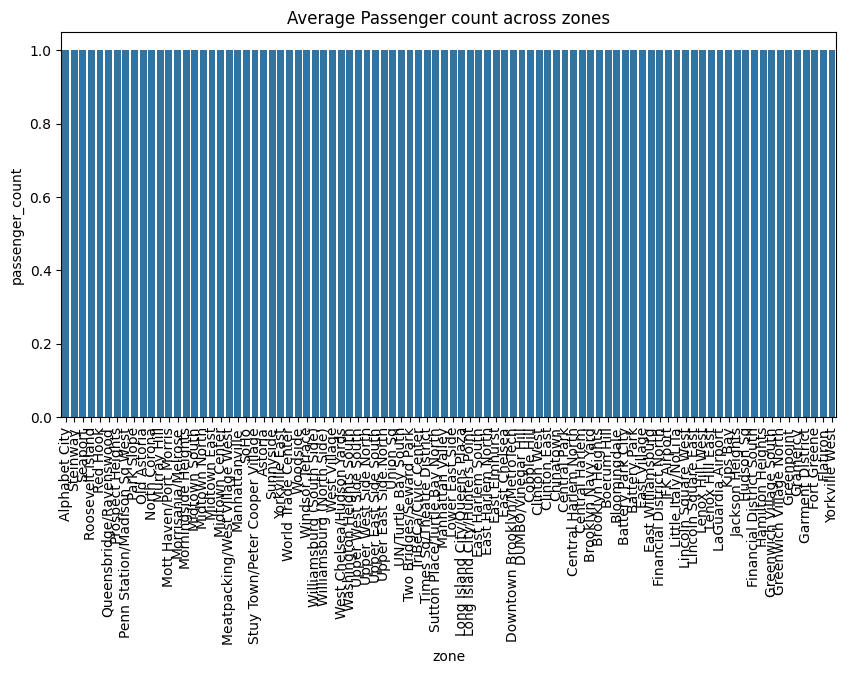

In [532]:
# How does passenger count vary across zones
zone_trip_data = pd.merge(df2,zones,left_on='PULocationID',right_on='LocationID',how='left')
grouped_zone_data = zone_trip_data.groupby('zone')
avg_passenger_cnt1 = grouped_zone_data['passenger_count'].mean().reset_index()
avg_passenger_cnt1 = avg_passenger_cnt1.sort_values(by='passenger_count',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='zone', y='passenger_count', data=avg_passenger_cnt1)
plt.title('Average Passenger count across zones')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

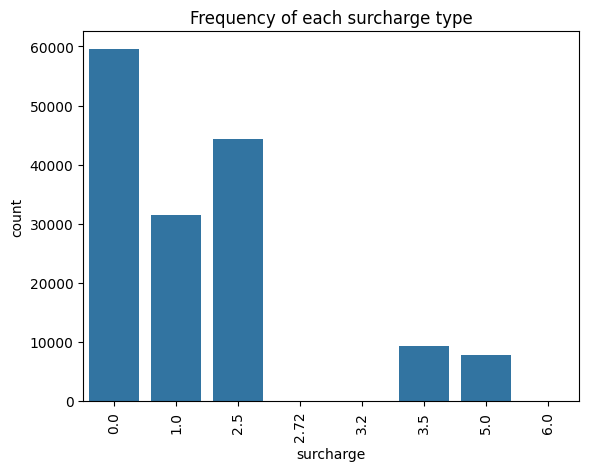

In [515]:
# How often is each surcharge applied?
surrchgcnt = df2['extra'].value_counts().reset_index()
surrchgcnt.columns=['surcharge','count']
sns.barplot(x='surcharge', y='count', data=surrchgcnt)
plt.title('Frequency of each surcharge type')
plt.xticks(rotation=90)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Utilize Advanced Route Optimization Software.
Analyze Historical Data for Better Planning.
Integrate Real-Time Traffic Data.
Adopt Dynamic Routing Capabilities.
Prioritize Last-Mile Delivery Efficiency.
Train Staff on New Technologies and Processes.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Cabs can be positioned in zones where own vehicles cannot be offered and commuters will take the vehicles more on weekdays compared to weekends
 commuters will take the vehicles more on day shift than on night shift.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Customer Segmentation and Tiered Pricing:
Analyze customer data: Identify customer segments based on purchase history, demographics, and usage patterns to understand their price sensitivity. 
Tiered pricing structure: Offer different price tiers for each customer segment, providing higher value customers with premium pricing options while offering lower prices to price-sensitive segments. 
Dynamic Pricing:
Real-time demand analysis: Monitor real-time demand fluctuations based on factors like time of day, seasonality, and inventory levels. 
Price adjustments: Adjust prices dynamically based on demand, raising prices during peak demand periods and lowering them during low demand periods. 
Price Elasticity Analysis:
Demand sensitivity assessment: Analyze how price changes affect customer demand for different product or service variations. 
Optimized pricing strategy: Use price elasticity data to identify the optimal price point for each product, maximizing revenue without significantly impacting sales volume. 
Competitive Price Monitoring:
Price intelligence tools: Utilize dedicated software to track competitor pricing across different channels in real-time. 
Comparative pricing analysis: Compare your prices to competitors' offerings to identify potential opportunities to adjust pricing based on market conditions. 
Cost-Based Adjustments:
Margin analysis: Regularly review cost structure to identify areas for cost reduction and optimize profit margins. 
Price adjustments based on cost changes: Adjust prices to reflect changes in production or operational costs while maintaining competitiveness. 